In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from pylab import rcParams
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm_notebook
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
data=pd.read_csv('SoDa_MERRA2_lat4.847_lon6.975_1980-01-01_2020-12-31_501774438.csv',parse_dates=['# Date'],index_col=['# Date'])

In [3]:
ts=data['Rainfall'].resample('M').mean()

In [4]:
train = ts[:393]
test = ts[393:]

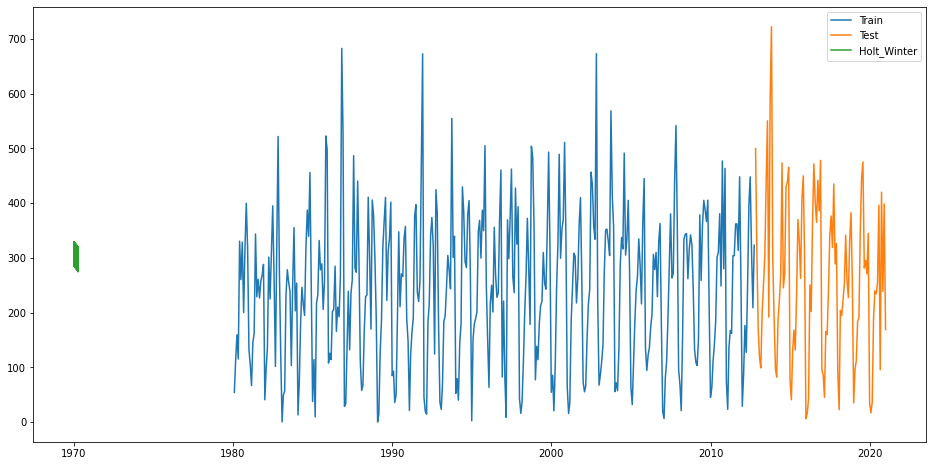

In [8]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [10]:
y_hat_avg.head()

# Date
2012-10-31 00:00:00     499.52124
2012-11-30 00:00:00    309.625308
2012-12-31 00:00:00    168.815052
2013-01-31 00:00:00    116.465868
2013-02-28 00:00:00     98.887212
Name: Rainfall, dtype: object

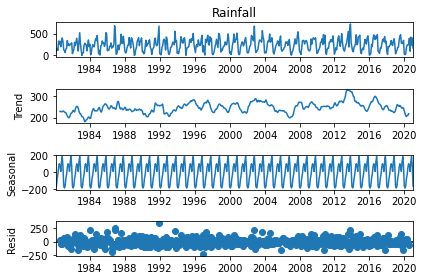

In [16]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(ts).plot()
result = sm.tsa.stattools.adfuller(ts)
plt.show()


In [15]:
result

(-4.626221342238602,
 0.00011553333355725574,
 14,
 477,
 {'1%': -3.444133731419755,
  '5%': -2.8676183066831036,
  '10%': -2.5700075029117166},
 5590.767695672865)

In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
# data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(ts)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(ts), len(ts))
print(yhat)
yhat1 =  model_fit.predict(start=492, end=600)
print(yhat1)

2021-01-31    204.970558
Freq: M, dtype: float64
2021-01-31    204.970558
2021-02-28    204.970558
2021-03-31    204.970558
2021-04-30    204.970558
2021-05-31    204.970558
                 ...    
2029-09-30    204.970558
2029-10-31    204.970558
2029-11-30    204.970558
2029-12-31    204.970558
2030-01-31    204.970558
Freq: M, Length: 109, dtype: float64


<AxesSubplot:xlabel='# Date'>

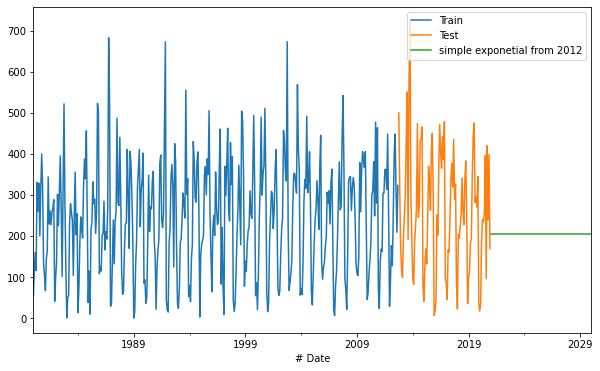

In [28]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend = True, label = 'Test')
yhat1.plot(legend=True, label = 'simple exponetial from 2012' )
# predictions.plot(legend=True, label = 'future predictions by arima')

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
# data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(ts)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(ts), len(ts))
print(yhat)
yhat1 =  model_fit.predict(start=492, end=600)
print(yhat1)

2021-01-31    204.97098
Freq: M, dtype: float64
2021-01-31    204.97098
2021-02-28    204.97098
2021-03-31    204.97098
2021-04-30    204.97098
2021-05-31    204.97098
                ...    
2029-09-30    204.97098
2029-10-31    204.97098
2029-11-30    204.97098
2029-12-31    204.97098
2030-01-31    204.97098
Freq: M, Length: 109, dtype: float64


In [25]:
ts

# Date
1980-01-31     54.253944
1980-02-29    111.454992
1980-03-31    159.547680
1980-04-30    115.285752
1980-05-31    330.417864
                 ...    
2020-08-31     95.613480
2020-09-30    419.964840
2020-10-31    238.740084
2020-11-30    398.439720
2020-12-31    168.858828
Freq: M, Name: Rainfall, Length: 492, dtype: float64

<AxesSubplot:xlabel='# Date'>

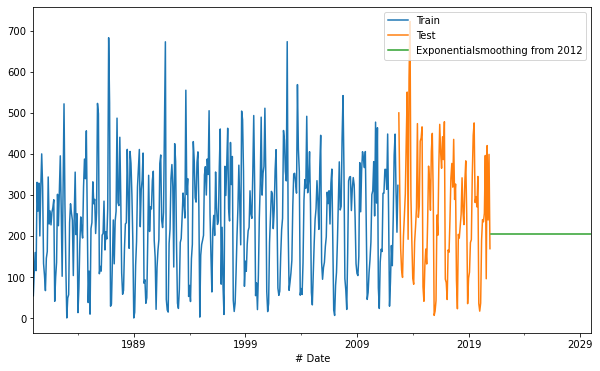

In [27]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend = True, label = 'Test')
yhat1.plot(legend=True, label = 'Exponentialsmoothing from 2012' )
# predictions.plot(legend=True, label = 'future predictions by arima')

In [112]:
hwmod=ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=12).fit()

In [113]:
test_pred=hwmod.forecast(99)
test_pred
# we can go higher than 99 way higher

2012-10-31    435.292701
2012-11-30    300.949501
2012-12-31     77.644599
2013-01-31     68.684000
2013-02-28    101.040666
                 ...    
2020-08-31    296.196076
2020-09-30    406.582410
2020-10-31    452.601011
2020-11-30    312.911040
2020-12-31     80.729385
Freq: M, Length: 99, dtype: float64

<AxesSubplot:xlabel='# Date'>

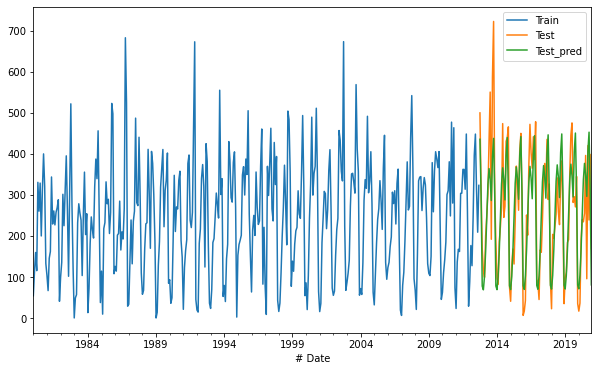

In [114]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend = True, label = 'Test')
test_pred.plot(legend = True, label = 'Test_pred')

In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
mean_squared_error(test,test_pred)

6763.267418275321

In [91]:
np.sqrt(mean_squared_error(test,test_pred))

82.23908692510709

In [92]:
ts.mean(),np.sqrt(ts.var())

(246.6050420548781, 137.6957417137905)

In [ ]:
# the lower the rmse the better
# the lower the mse the better
# the lower the mae the better

In [70]:
hwmod=ExponentialSmoothing(ts,trend='add',seasonal='mul',seasonal_periods=12).fit()

In [74]:
fut_pred=hwmod.forecast(108)
fut_pred

2021-01-31     57.883793
2021-02-28     90.316410
2021-03-31    168.612648
2021-04-30    206.885334
2021-05-31    280.281913
                 ...    
2029-08-31    222.791204
2029-09-30    339.774081
2029-10-31    338.950289
2029-11-30    287.097583
2029-12-31     64.768862
Freq: M, Length: 108, dtype: float64

<AxesSubplot:xlabel='# Date'>

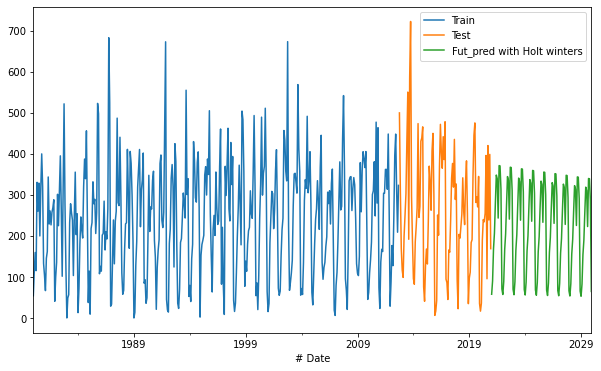

In [80]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend = True, label = 'Test')
# test_pred.plot(legend = True, label = 'Test_pred')
fut_pred.plot(legend = True, label = 'Fut_pred with Holt winters')

In [120]:
ts1=ts.reset_index()
ts1.columns = ['ds', 'y']
ts1.head()

,ds,y
0,1980-01-31,54.253944
1,1980-02-29,111.454992
2,1980-03-31,159.547680
3,1980-04-30,115.285752
4,1980-05-31,330.417864
